In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/marcocamilo/Documents/Data Science/Courses/NLP Career Path - Codecademy/Portfolio Projects/Biodiversity in National Parks':
  os.chdir(r'/Users/marcocamilo/Documents/Data Science/Courses/NLP Career Path - Codecademy/Portfolio Projects/Biodiversity in National Parks')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/np/dfv8cwdn2xg711wf4204r88w0000gn/T/ipykernel_68918/731388620.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/importlib/_bootstrap.py": 1714597625.157932, "/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/importlib/_bootstrap_external.py": 1714597625.1609745, "/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/codecs.py": 1714597623.5490813, "/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/encodings/aliases.py": 1714597624.4391308, "/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/encodings/__init__.py": 1714597624.4362664, "/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/encodings/utf_8.py": 1714597624.7934453, "/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/abc.py": 1714597623.485861, "/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/io.py": 1714597623.6631508, "/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/stat.py": 1714597623.8399491, "/Users/marcocamilo/.pyenv/versions/3.10.14/lib/python3.10/_collections_abc.py": 1714597623.447531, "/Users/marcocamilo/.p

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
display(species.sample(5))

,category,scientific_name,common_names,conservation_status
292,Bird,Sitta canadensis,Red-Breasted Nuthatch,NaN
1228,Vascular Plant,Valerianella radiata,"Beaked Corn-Salad, Corn Salad",NaN
2113,Vascular Plant,Juncus dichotomus,Rush,NaN
4349,Vascular Plant,Thalictrum sparsiflorum var. saximontanum,"Fewflower Meadowrue, Fewflower Meadow-Rue",NaN
3215,Bird,Phainopepla nitens,Phainopepla,Species of Concern


In [4]:
display(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


None

In [5]:
display(observations.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


None

'\n'

In [6]:
observations.sample(5)

,scientific_name,park_name,observations
612,Lewisia rediviva var. rediviva,Yellowstone National Park,252
2358,Heterotheca villosa var. villosa,Yosemite National Park,124
12377,Polygala curtissii,Great Smoky Mountains National Park,84
14009,Spiraea vanhouttei,Bryce National Park,108
12539,Nyssa sylvatica,Bryce National Park,60


In [7]:
def column_eda(dataset):
    cols = list(dataset.columns)
    for col in cols:
        print(f'---------------{col}---------------')
        print(f'Unique values:', dataset[col].nunique(), 
              f'Non-null values: {dataset[col].notnull().sum()}',
              f'Missing values: {dataset[col].isnull().sum()}\n', 
              sep='\n')
        print(dataset[col].value_counts().reset_index().head(4))

column_eda(species)

---------------category---------------
Unique values:
7
Non-null values: 5824
Missing values: 0

            category  count
0     Vascular Plant   4470
1               Bird    521
2  Nonvascular Plant    333
3             Mammal    214
---------------scientific_name---------------
Unique values:
5541
Non-null values: 5824
Missing values: 0

        scientific_name  count
0     Castor canadensis      3
1           Canis lupus      3
2  Hypochaeris radicata      3
3         Columba livia      3
---------------common_names---------------
Unique values:
5504
Non-null values: 5824
Missing values: 0

         common_names  count
0  Brachythecium Moss      7
1       Dicranum Moss      7
2         Panic Grass      6
3          Bryum Moss      6
---------------conservation_status---------------
Unique values:
4
Non-null values: 191
Missing values: 5633

  conservation_status  count
0  Species of Concern    161
1          Endangered     16
2          Threatened     10
3         In Recovery     

In [8]:
print('Old conservation status:\n', list(species.conservation_status.unique()))

species.conservation_status = species.conservation_status.fillna('No intervention')

print('New conservation status:\n', list(species.conservation_status.unique()))

Old conservation status:
 [nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
New conservation status:
 ['No intervention', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']


In [9]:
duplicates = species.duplicated().sum()
print(f'Overall duplicates (rows): {duplicates}')

repeated_scientific_names = species.duplicated(subset=['scientific_name']).sum()
print(f'Duplicated scientific names: {repeated_scientific_names}')

repeated_common_names =species.duplicated(subset=['common_names']).sum() 
print(f'Duplicated common names: {repeated_common_names}')

Overall duplicates (rows): 0
Duplicated scientific names: 283
Duplicated common names: 320


In [10]:
display(species.common_names.value_counts().reset_index()[:5])
display(species.query("common_names == 'Brachythecium Moss'")[['common_names', 'scientific_name']])

,common_names,count
0,Brachythecium Moss,7
1,Dicranum Moss,7
2,Panic Grass,6
3,Bryum Moss,6
4,Sphagnum,6


,common_names,scientific_name
2812,Brachythecium Moss,Brachythecium digastrum
2813,Brachythecium Moss,Brachythecium oedipodium
2814,Brachythecium Moss,Brachythecium oxycladon
2815,Brachythecium Moss,Brachythecium plumosum
2816,Brachythecium Moss,Brachythecium rivulare
2817,Brachythecium Moss,Brachythecium rutabulum
2818,Brachythecium Moss,Brachythecium salebrosum


In [11]:
duplicated_species = species[species['scientific_name'].duplicated(keep=False)]

display('-------Sample of duplicated scientific names-------')
display(duplicated_species.head())

def display_duplicated_species(scientific_name):
    duplicated_entries = duplicated_species[duplicated_species['scientific_name'] == scientific_name]
    display(f'-------Duplicated \'{scientific_name}\'-------')
    display(duplicated_entries)

scientific_names_to_check = ['Cervus elaphus', 'Canis lupus', 'Odocoileus virginianus']
for scientific_name in scientific_names_to_check:
    display_duplicated_species(scientific_name)

'-------Sample of duplicated scientific names-------'

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No intervention
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No intervention
8,Mammal,Canis lupus,Gray Wolf,Endangered
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",No intervention


"-------Duplicated 'Cervus elaphus'-------"

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,No intervention


"-------Duplicated 'Canis lupus'-------"

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


"-------Duplicated 'Odocoileus virginianus'-------"

,category,scientific_name,common_names,conservation_status
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No intervention
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",No intervention


In [12]:
species = species.drop_duplicates(subset = ['scientific_name'], keep= 'first')

repeated_scientific_names = species.scientific_name[species.scientific_name.duplicated()]
print(f'Duplicated scientific names: {len(repeated_scientific_names)}\n')

print('-------Previously duplicated examples (now clean)-------')
scientific_names_to_check = ['Cervus elaphus', 'Canis lupus', 'Odocoileus virginianus']
display(species[species['scientific_name'].isin(scientific_names_to_check)])

Duplicated scientific names: 0

-------Previously duplicated examples (now clean)-------


,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No intervention
8,Mammal,Canis lupus,Gray Wolf,Endangered


In [13]:
column_eda(observations)

---------------scientific_name---------------
Unique values:
5541
Non-null values: 23296
Missing values: 0

        scientific_name  count
0      Myotis lucifugus     12
1         Puma concolor     12
2  Hypochaeris radicata     12
3        Holcus lanatus     12
---------------park_name---------------
Unique values:
4
Non-null values: 23296
Missing values: 0

                             park_name  count
0  Great Smoky Mountains National Park   5824
1               Yosemite National Park   5824
2                  Bryce National Park   5824
3            Yellowstone National Park   5824
---------------observations---------------
Unique values:
304
Non-null values: 23296
Missing values: 0

   observations  count
0            84    220
1            85    210
2            91    206
3            92    203


count    23296.000000
mean       142.287904
std         69.890532
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64


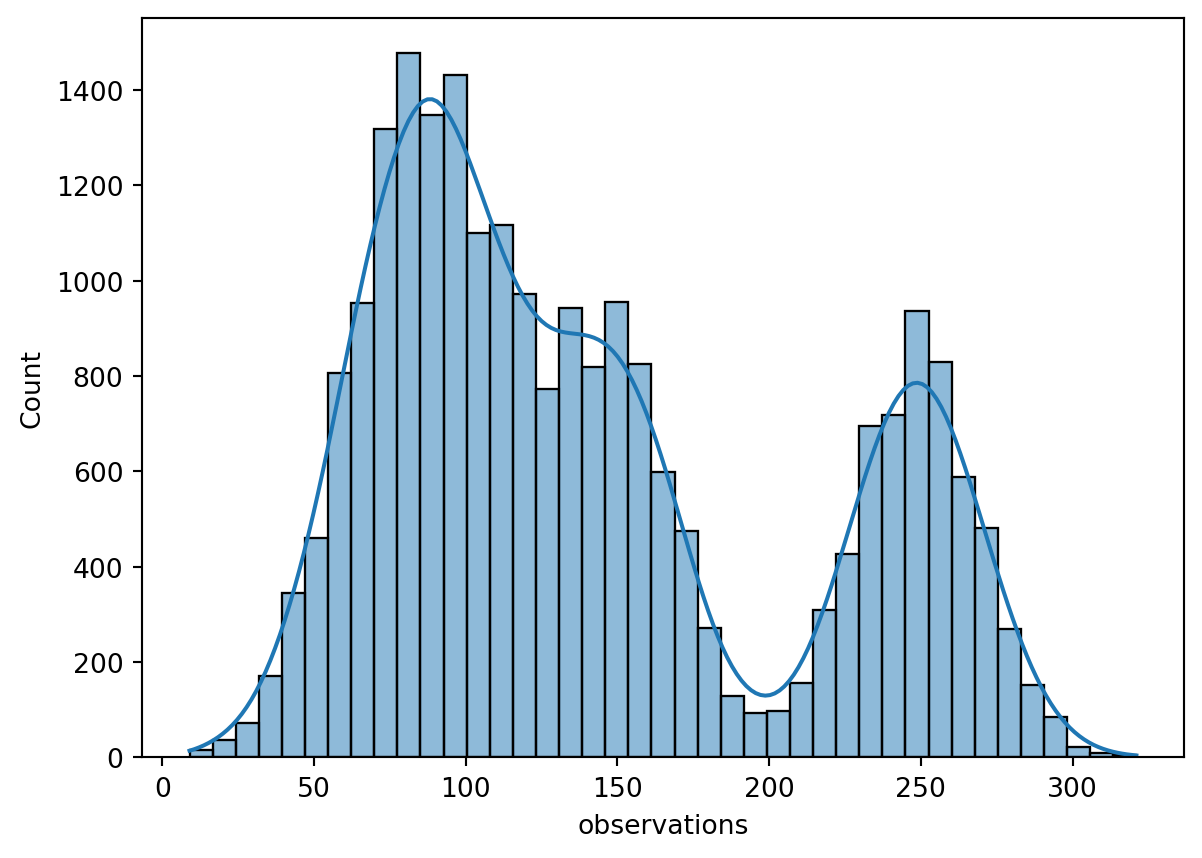

Total number of observations: 3314739 in the past 7 days.


In [14]:
print(observations.observations.describe())

sns.histplot(x = 'observations', data = observations, kde=True)
plt.show()

print('Total number of observations:', observations.observations.sum(), 'in the past 7 days.')

Total species under protection: 178
Total species not under protection: 5363


'Absolute frequencies'

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,0.0,3.0,2.0,0.0,0.0,2.0


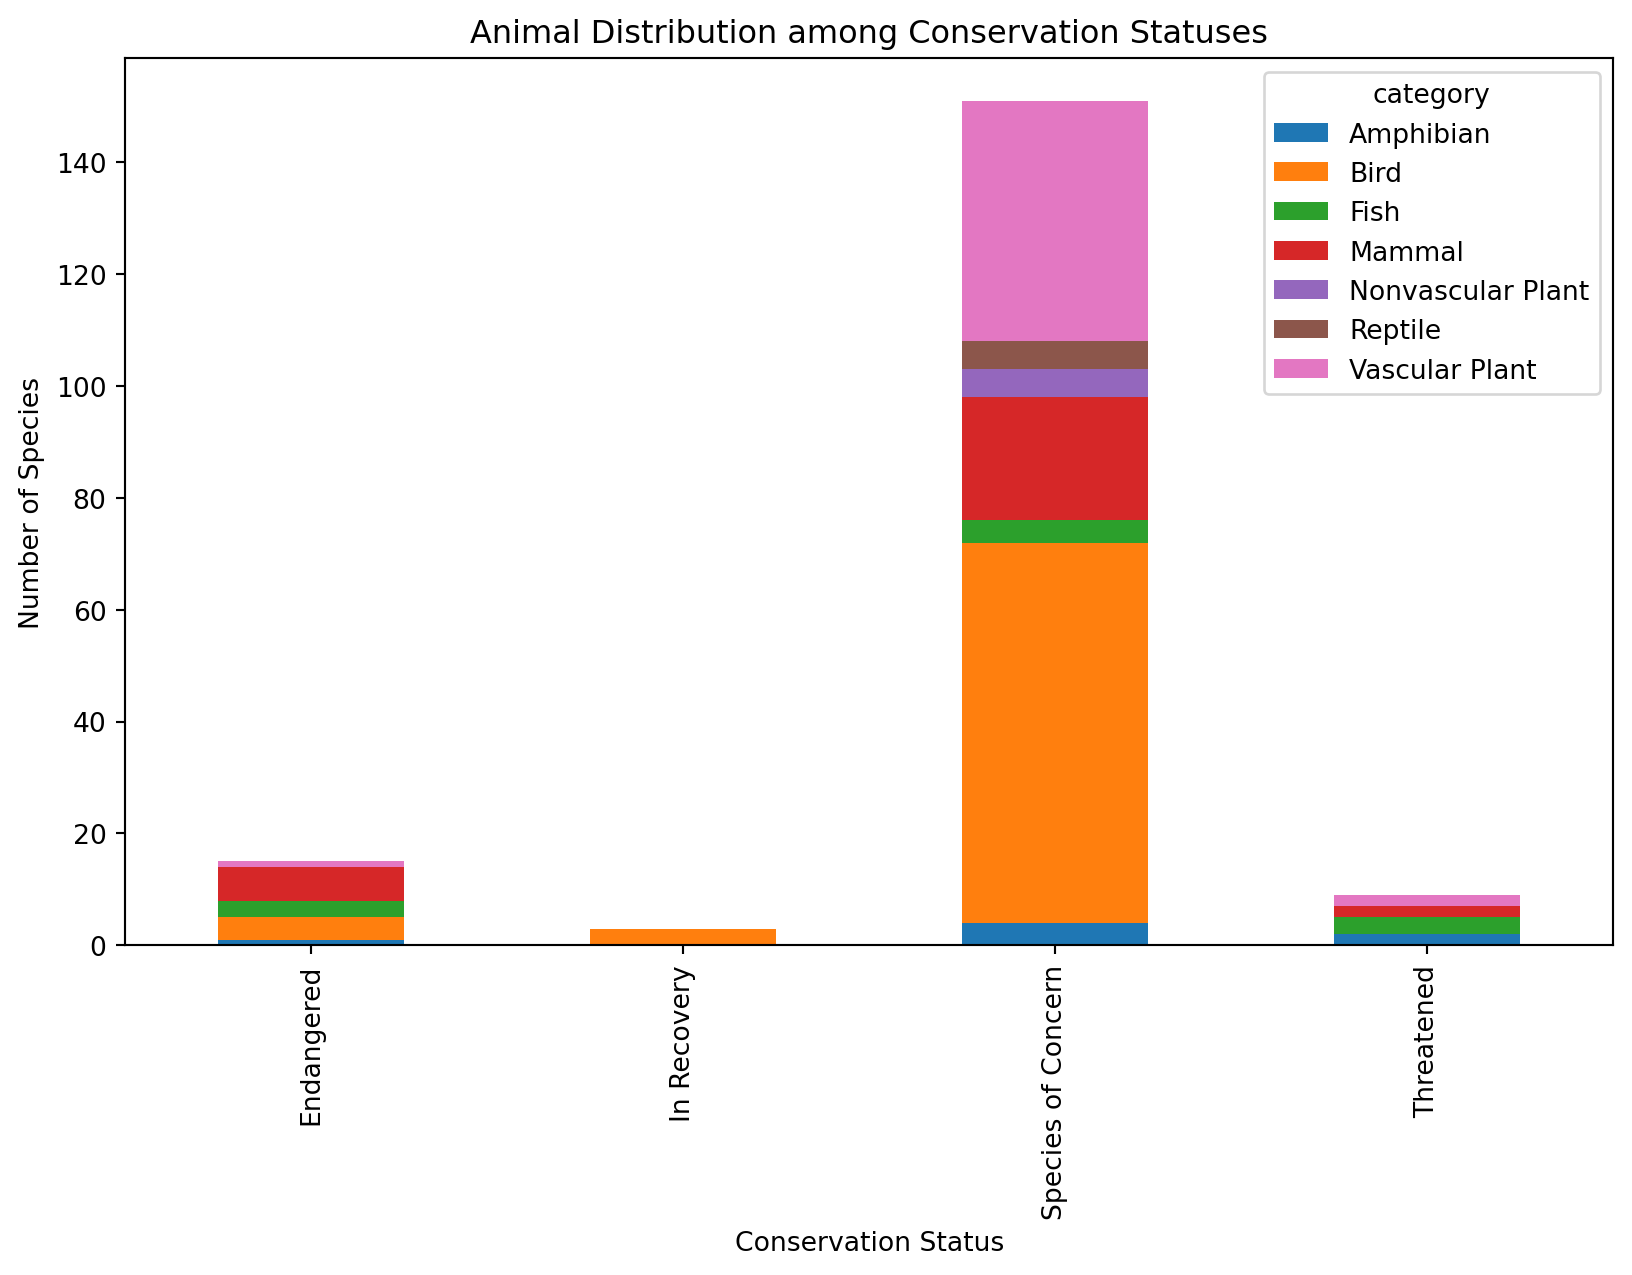

<Figure size 672x480 with 0 Axes>

In [15]:
num_conservation = len(species[species.conservation_status != 'No intervention'])
num_not_conservation = len(species[species.conservation_status == 'No intervention'])

print(f'Total species under protection: {num_conservation}')
print(f'Total species not under protection: {num_not_conservation}')

category_conservation = species[species.conservation_status != 'No intervention']\
                        .groupby(['conservation_status', 'category'])['scientific_name']\
                        .count()\
                        .unstack()\
                        .replace('nan', np.nan).fillna(0)

display("Absolute frequencies", category_conservation)

ax = category_conservation.plot(kind='bar', figsize=(10,6), stacked = True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
plt.title("Animal Distribution among Conservation Statuses")
plt.show()
plt.clf()

In [16]:
category_conservation_rel = species[species.conservation_status != 'No intervention']\
                            .groupby(['category', 'conservation_status'])['scientific_name']\
                            .count()\
                            .unstack()\
                            .replace('nan', np.nan).fillna(0)\
                            .apply(lambda x:  (100*x / x.sum()).round(2))\
                            .transpose()
display("Relative frequencies by category", category_conservation_rel)

'Relative frequencies by category'

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,6.67,26.67,20.00,40.00,0.00,0.00,6.67
In Recovery,0.00,100.00,0.00,0.00,0.00,0.00,0.00
Species of Concern,2.65,45.03,2.65,14.57,3.31,3.31,28.48
Threatened,22.22,0.00,33.33,22.22,0.00,0.00,22.22


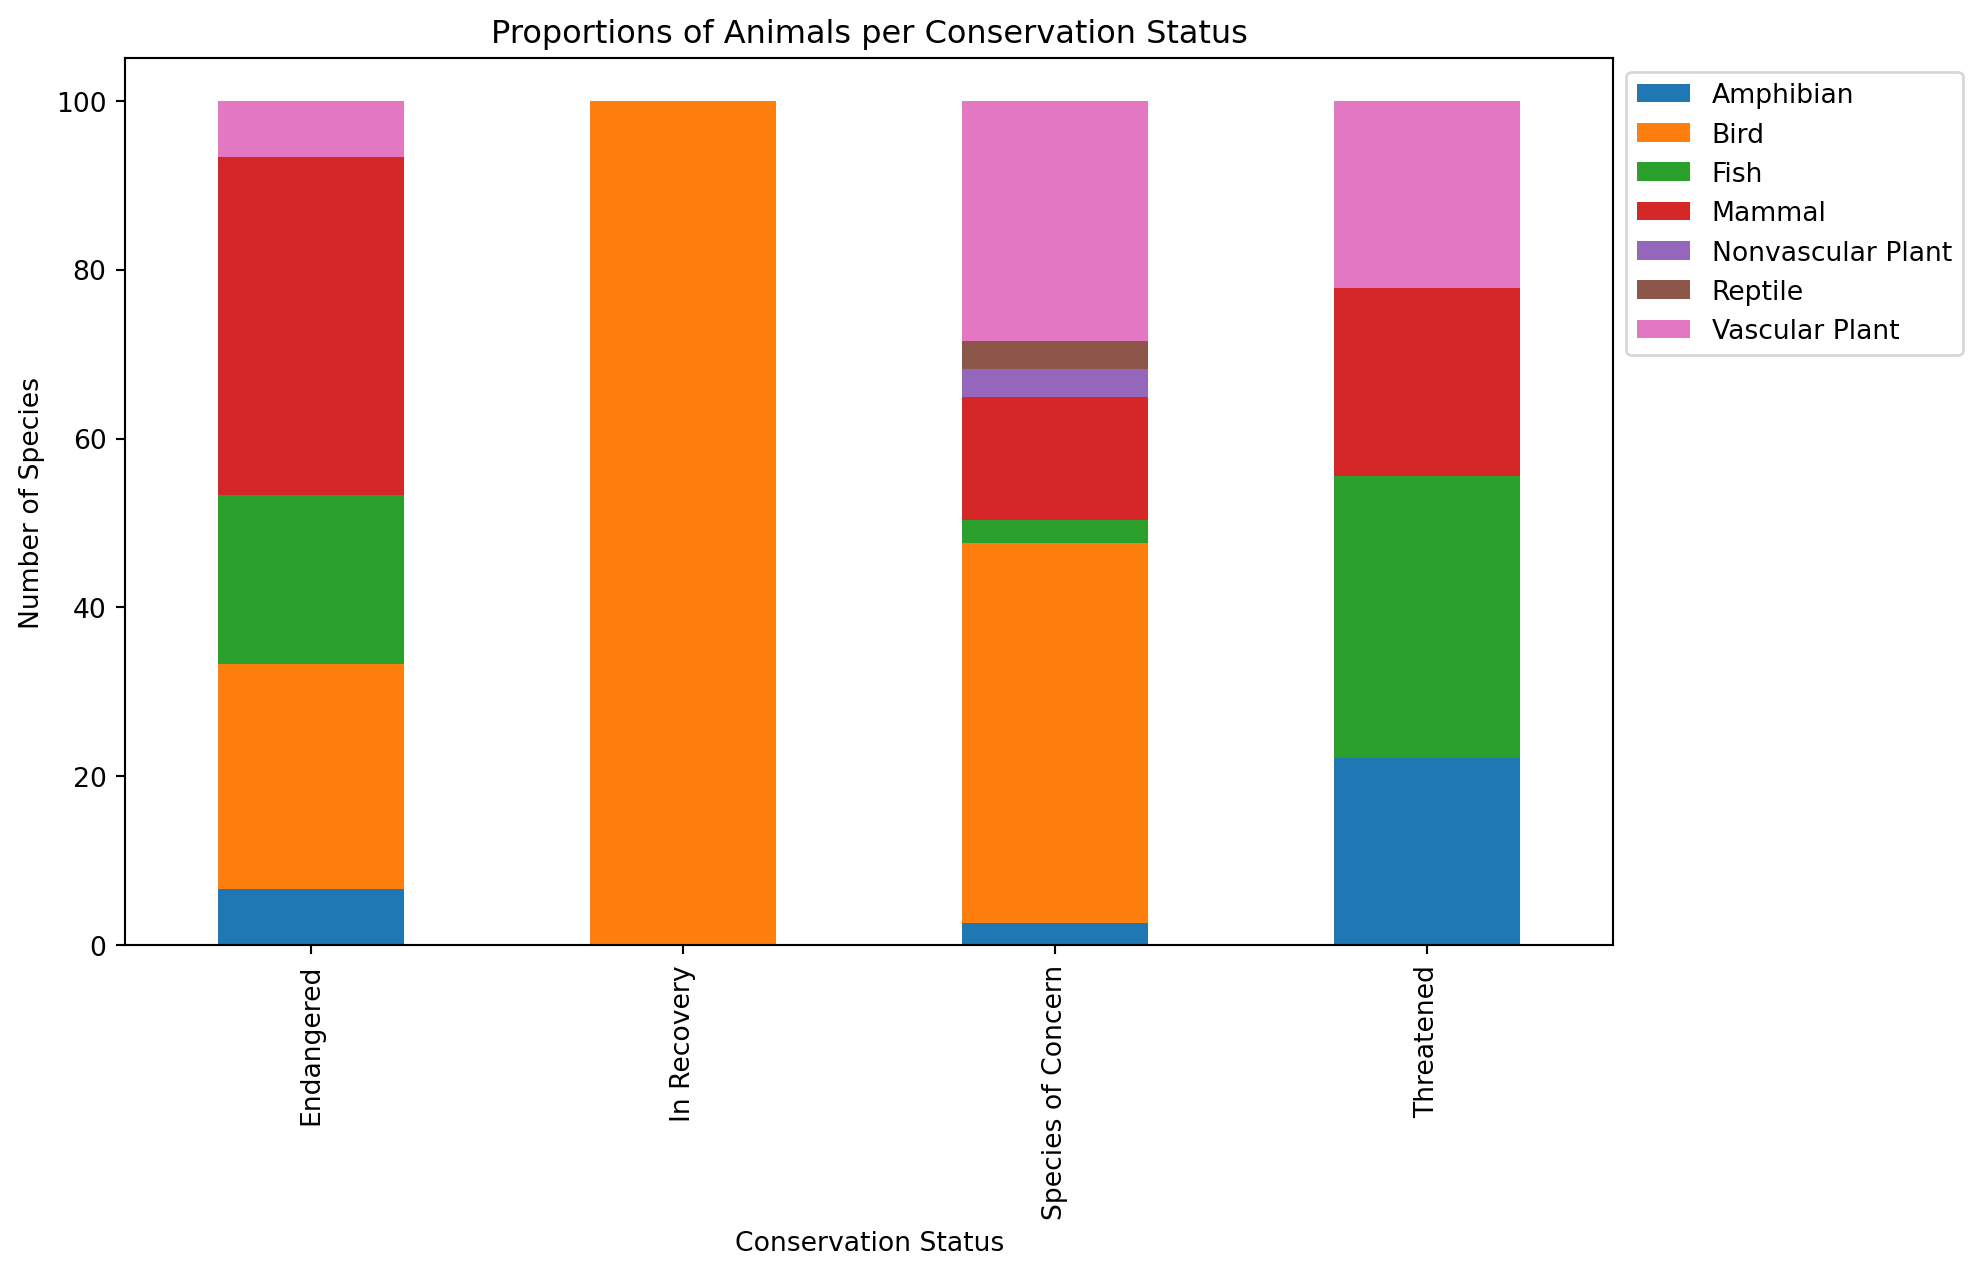

<Figure size 672x480 with 0 Axes>

In [17]:
axrel = category_conservation_rel.plot(kind='bar', figsize=(10,6), stacked = True)
axrel.set_xlabel('Conservation Status')
axrel.set_ylabel('Number of Species')
axrel.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.title("Proportions of Animals per Conservation Status")
plt.show()
plt.clf()

In [18]:
species['protected'] = species.conservation_status != 'No intervention'

category_protections = species.groupby(['category', 'protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot_table(columns = 'protected',
                                    index = 'category',
                                    values = 'scientific_name')\
                        .reset_index()
category_protections.columns = ['category', 'not_protected', 'protected']

category_protections['percentage_protected'] = (category_protections.protected / \
                                                (category_protections.protected + category_protections.not_protected) * 100)\
                                                .round(2)
display(category_protections)

,category,not_protected,protected,percentage_protected
0,Amphibian,72.0,7.0,8.86
1,Bird,413.0,75.0,15.37
2,Fish,115.0,10.0,8.00
3,Mammal,146.0,30.0,17.05
4,Nonvascular Plant,328.0,5.0,1.50
5,Reptile,73.0,5.0,6.41
6,Vascular Plant,4216.0,46.0,1.08


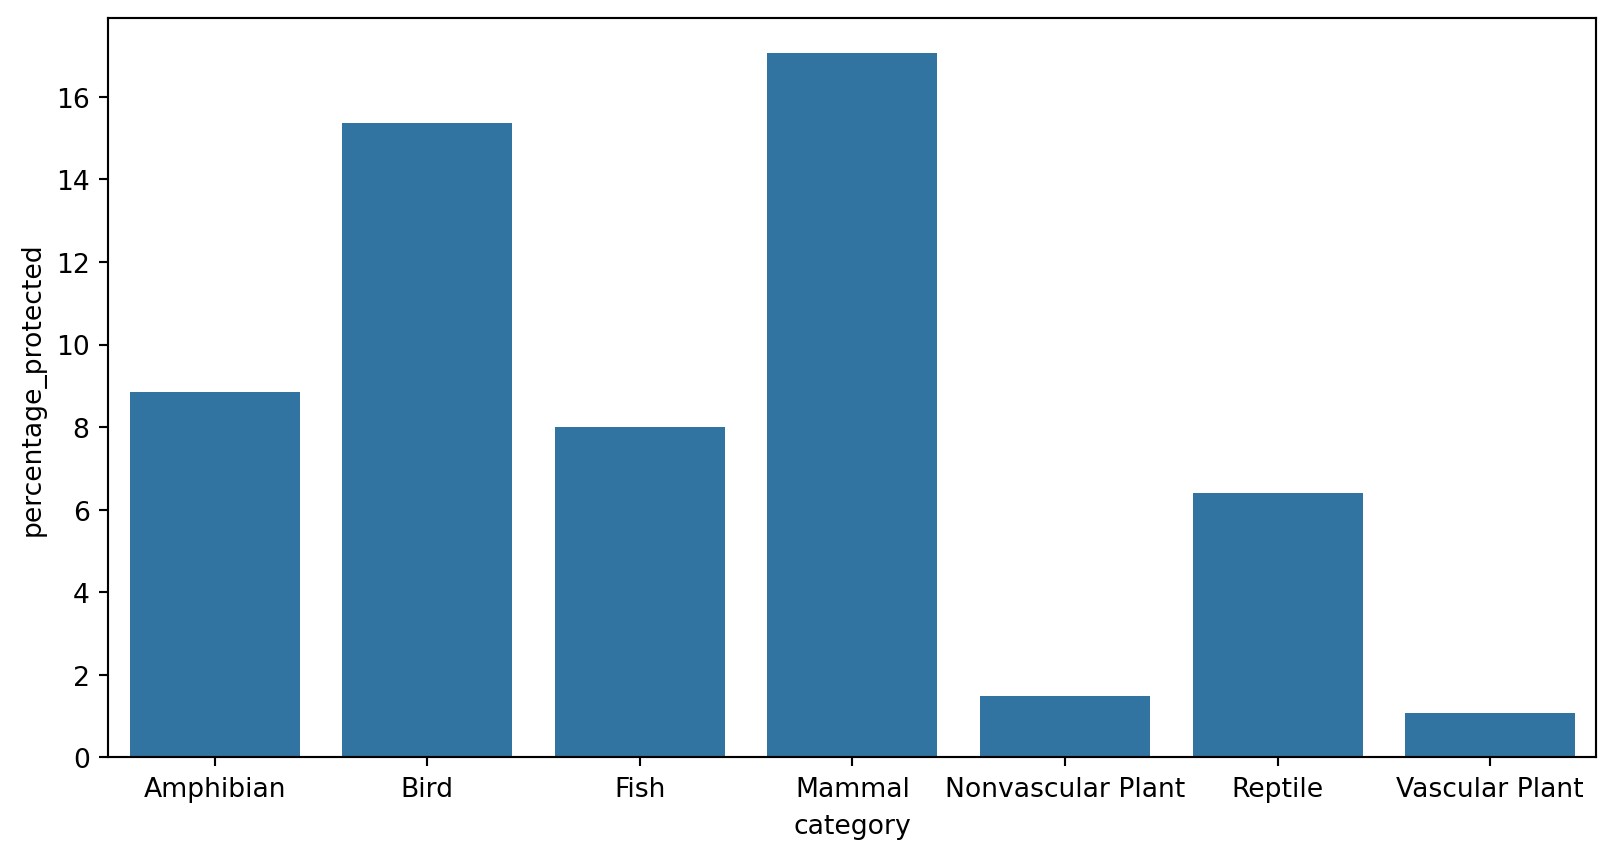

<Figure size 672x480 with 0 Axes>

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data = category_protections, y = 'percentage_protected', x = 'category')
plt.show()
plt.clf()

,Animal Pair,p-value
0,Bird,68.76
2,Amphibian,12.76
1,Reptile,3.84
3,Fish,3.52
4,Vascular Plant,0.00
5,Nonvascular Plant,0.00


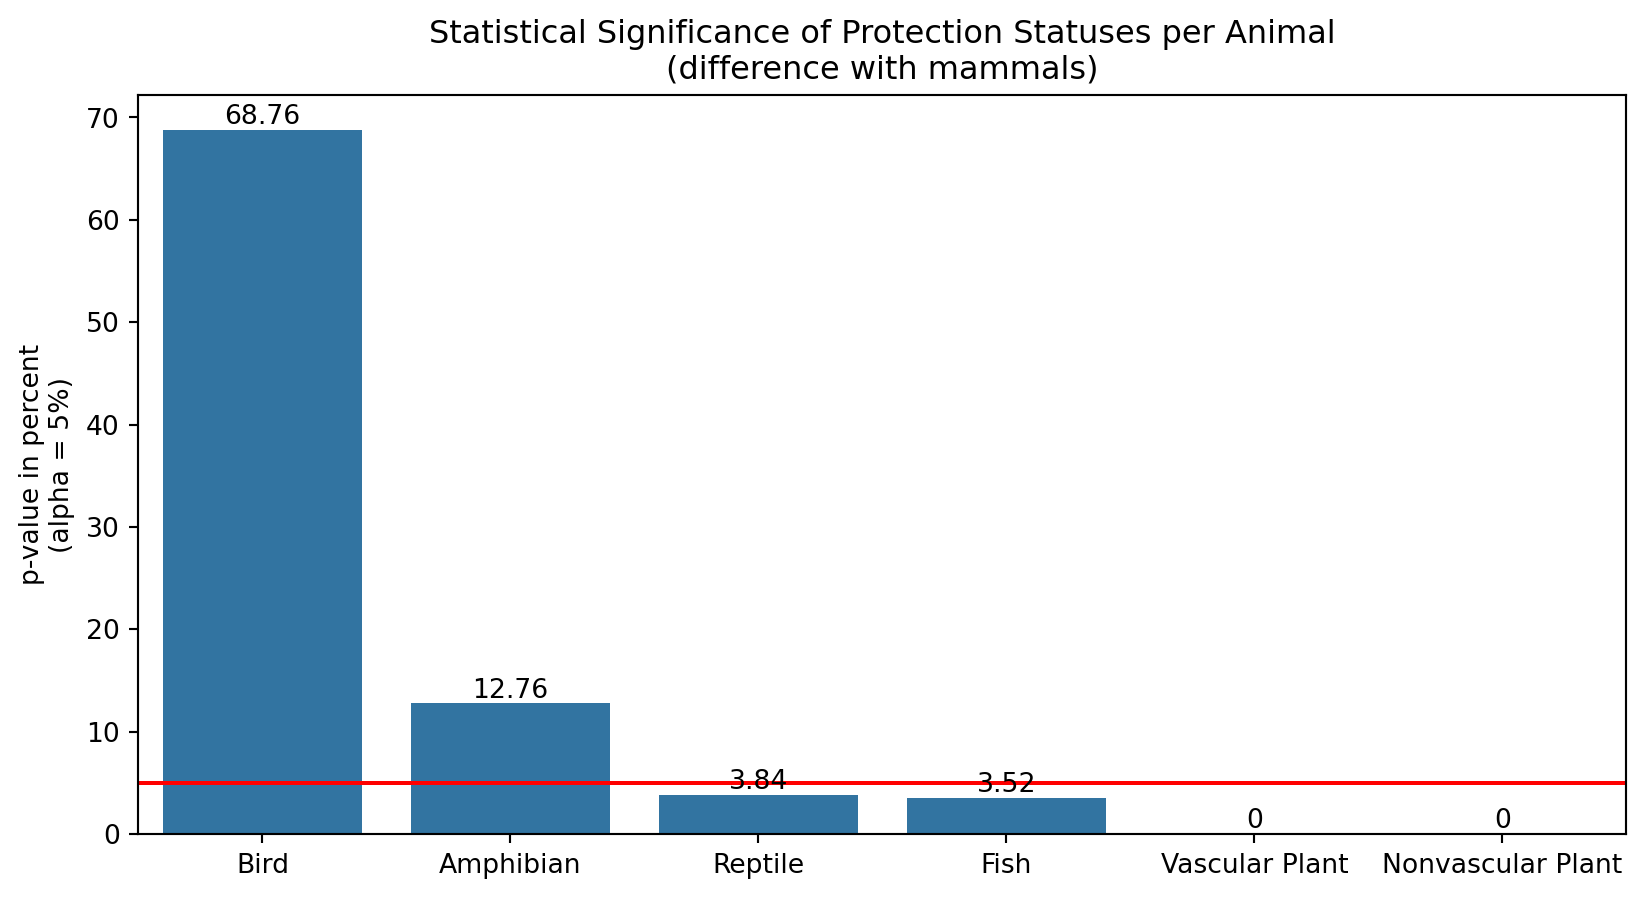

In [20]:
from scipy.stats import chi2_contingency

# Permutations
categories = list(species.category.unique())
combinations_mammal = [['Mammal', i] for i in categories][1:]
category_protections_part = category_protections.iloc[:, 0:3]
category_protections_part = category_protections_part.set_index('category')

# Significant Differences Data
sign_data = {'Animal Pair': [], 'p-value': []}
for pair in combinations_mammal:
    contingency_table = pd.DataFrame({pair[0]: category_protections_part.loc[pair[0]],
                                    pair[1]: category_protections_part.loc[pair[1]]}) 
    chi2, pval, dof, expected = chi2_contingency(contingency_table)
    sign_data['Animal Pair'].append(pair[1])
    sign_data['p-value'].append((pval*100).round(2))
sign_data = pd.DataFrame(data = sign_data).sort_values('p-value', ascending=False)
display(sign_data)

# Plot
plt.subplots(figsize=(10,5))
ax =sns.barplot(data = sign_data, x = 'Animal Pair', y = 'p-value')
plt.title('Statistical Significance of Protection Statuses per Animal\n(difference with mammals)')
plt.axhline(5, color='red')
ax.set_xlabel("")
ax.set_ylabel('p-value in percent\n(alpha = 5%)')
# plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

In [21]:
merged_df = observations.merge(species[['category', 'scientific_name', 'common_names']], how='left')
merged_df = merged_df.drop_duplicates()

merged_df_grouped = merged_df.groupby(['park_name', 'scientific_name', 'common_names', 'category']).observations\
                        .sum().sort_values(ascending=False)\
                        .reset_index()
display(merged_df_grouped.head())

,park_name,scientific_name,common_names,category,observations
0,Yellowstone National Park,Holcus lanatus,"Common Velvet Grass, Velvetgrass",Vascular Plant,805
1,Yellowstone National Park,Puma concolor,Panther (Mountain Lion),Mammal,753
2,Yellowstone National Park,Procyon lotor,"Common Raccoon, Raccoon",Mammal,745
3,Yellowstone National Park,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",Vascular Plant,726
4,Yellowstone National Park,Columba livia,Rock Dove,Bird,722


In [22]:
merged_df_grouped_max = merged_df_grouped.loc[merged_df_grouped\
                                                    .groupby(['park_name'])\
                                                    ['observations'].idxmax()]\
                                                .sort_values(by = 'observations', ascending=False)
display(merged_df_grouped_max)

,park_name,scientific_name,common_names,category,observations
0,Yellowstone National Park,Holcus lanatus,"Common Velvet Grass, Velvetgrass",Vascular Plant,805
112,Yosemite National Park,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",Vascular Plant,505
298,Bryce National Park,Columba livia,Rock Dove,Bird,339
2402,Great Smoky Mountains National Park,Streptopelia decaocto,Eurasian Collared-Dove,Bird,256
